<img src="./figures/pylogo.png" alt="Indentation" width="50%" height="50%">



## Project 1: ECCC temperature data

In previous sections, we presented how to use the Pandas library which allowed us to process and manipulate data sets. Combining this with Python's Datetime and Matplotlib libraries, we were able to quickly visualize our data.

We will continue to discover the functionality of these libraries in a practical case by analyzing the daily temperature data recorded by one of the Environment and Climate Change Canada stations located in Montreal / McTavish between the period 1948 and 2017 (file named 'MONTREAL_tasmoy_1948_2017.txt' in ./DATA directory)

To complete and enrich our analysis, a new Python library will be presented: <b> Seaborn </b>.

- the Seaborn library is based on matplotlib.
- it allows to draw more complex graphs

For more information:

https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

This link presents a gallery of chart types to be realized with Seaborn:
https://seaborn.pydata.org/examples/index.html

### 1- Opening and reading our time series

In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

df = pd.DataFrame()

# We open ascii file and store information in a new DataFrame
with open('./DATA/MONTREAL_tasmoy_1948_2017.txt', 'r') as file:
     rows = file.read()
data_EC_Montreal = [float(row) for row in rows.split()]

We have created a 1D field but we have no temporal information in our file.
Knowing that our registration covers the period 1948 - 2017, we will format our dates with the <b> datetime </b> module of Python. 

In [2]:
# We know that the time series starts on January 1, 1948 and ends on December 31, 2017 inclusively
# We create a Datetime object instance to complete our DataFrame
start = date(1948, 1, 1)
end = date(2017, 12, 31)
delta=(end-start) 
nb_days = delta.days + 1 
rng = pd.date_range(start, periods=nb_days, freq='D')

# We will use DateTime object as DataFrame index
df['datetime'] = rng
df.index = df['datetime'] 

df['Temperature Montreal'] = data_EC_Montreal
df.head()

,datetime,Temperature Montreal
datetime,,
1948-01-01,1948-01-01,-12.0
1948-01-02,1948-01-02,-8.9
1948-01-03,1948-01-03,-3.4
1948-01-04,1948-01-04,-3.4
1948-01-05,1948-01-05,-3.1


In [3]:
from tabulate import tabulate
print(tabulate(df.head(), headers='keys', tablefmt='pipe'))

| datetime            | datetime            |   Temperature Montreal |
|:--------------------|:--------------------|-----------------------:|
| 1948-01-01 00:00:00 | 1948-01-01 00:00:00 |                  -12   |
| 1948-01-02 00:00:00 | 1948-01-02 00:00:00 |                   -8.9 |
| 1948-01-03 00:00:00 | 1948-01-03 00:00:00 |                   -3.4 |
| 1948-01-04 00:00:00 | 1948-01-04 00:00:00 |                   -3.4 |
| 1948-01-05 00:00:00 | 1948-01-05 00:00:00 |                   -3.1 |


In [4]:
dir(df) # the dir () function allows to list the functions that are applicable to our DataFrame object

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',

We assigned our time series in a Pandas DataFrame and then formatted the date as a Datetime object.

It is now easy to manipulate the dataset and apply some simple functions.

### 2- Calculation of indices on the temperature data

- We will develop and apply a function to calculate the quantiles of our distribution

- By resampling our series with the <b> .resample () </b> method of Pandas, we will see how to apply native functions of numpy and apply our own function.

In [5]:
# Creating our index that calculates the quantile of the distribution
# We use the numpy .percentile () function
def percentile(n):
    def percentile_(x):
        return np.nanpercentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_         

- <b> .resample () </b> and <b> .agg () </b> methods of Pandas

The <b> .resample () </b> method is very useful for frequency conversion and time series resampling. The object (here DataFrame) must have a data / time index (DatetimeIndex) in order to be used.
Several resampling frequencies are available (time, week, month, season, year ...)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html


The <b> .agg () </b> method is used for aggregation of data according to a list of functions to be applied to each column, resulting in an aggregated result with a hierarchical index.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html

In our example, we will resample our data set by month and calculate for each month the average, the minimum, the maximum and the 90th and 95th quantiles.

In [6]:
resamp_Montreal = df.resample('M').agg([np.mean, np.min, np.max, percentile(90), percentile(95)])
resamp_Montreal.head()

Temperature Montreal                                        
                           mean  amin  amax percentile_90 percentile_95
datetime                                                               
1948-01-31           -10.990323 -23.4  -3.1         -3.60         -3.40
1948-02-29            -9.586207 -20.8   3.6         -2.64         -0.32
1948-03-31            -2.461290 -17.8   7.5          5.60          6.40
1948-04-30             6.640000  -1.7  14.5         12.08         13.13
1948-05-31            12.664516   6.7  21.7         16.70         18.35

In [7]:
from tabulate import tabulate
print(tabulate(resamp_Montreal.head(), headers='keys', tablefmt='pipe'))

| datetime            |   ('Temperature Montreal', 'mean') |   ('Temperature Montreal', 'amin') |   ('Temperature Montreal', 'amax') |   ('Temperature Montreal', 'percentile_90') |   ('Temperature Montreal', 'percentile_95') |
|:--------------------|-----------------------------------:|-----------------------------------:|-----------------------------------:|--------------------------------------------:|--------------------------------------------:|
| 1948-01-31 00:00:00 |                          -10.9903  |                              -23.4 |                               -3.1 |                                       -3.6  |                                       -3.4  |
| 1948-02-29 00:00:00 |                           -9.58621 |                              -20.8 |                                3.6 |                                       -2.64 |                                       -0.32 |
| 1948-03-31 00:00:00 |                           -2.46129 |                              -1

In [8]:
# simple step to remove the row 'Temperature Montreal' 
resamp_Montreal = resamp_Montreal.loc[:,'Temperature Montreal'] 
resamp_Montreal.head() 

,mean,amin,amax,percentile_90,percentile_95
datetime,,,,,
1948-01-31,-10.990323,-23.4,-3.1,-3.60,-3.40
1948-02-29,-9.586207,-20.8,3.6,-2.64,-0.32
1948-03-31,-2.461290,-17.8,7.5,5.60,6.40
1948-04-30,6.640000,-1.7,14.5,12.08,13.13
1948-05-31,12.664516,6.7,21.7,16.70,18.35


In [9]:
from tabulate import tabulate
print(tabulate(resamp_Montreal.head(), headers='keys', tablefmt='pipe'))

| datetime            |      mean |   amin |   amax |   percentile_90 |   percentile_95 |
|:--------------------|----------:|-------:|-------:|----------------:|----------------:|
| 1948-01-31 00:00:00 | -10.9903  |  -23.4 |   -3.1 |           -3.6  |           -3.4  |
| 1948-02-29 00:00:00 |  -9.58621 |  -20.8 |    3.6 |           -2.64 |           -0.32 |
| 1948-03-31 00:00:00 |  -2.46129 |  -17.8 |    7.5 |            5.6  |            6.4  |
| 1948-04-30 00:00:00 |   6.64    |   -1.7 |   14.5 |           12.08 |           13.13 |
| 1948-05-31 00:00:00 |  12.6645  |    6.7 |   21.7 |           16.7  |           18.35 |


### 3- Some examples of graphics with the Seaborn library

Now that we have some statistics on our DataFrame, we will use Python's Seaborn library to visualize them. 

<img src = "./figures/seaborn.png" alt = "Seaborn" width = "60%" height = "70%">


- Example: Heatmap

https://seaborn.pydata.org/generated/seaborn.heatmap.html


For example, we would like to observe the variation of the average temperature for all the months of the year and all the years. We are going to define two new columns in our DataFrame in which will be assigned only the years and the months respectively. 

In [10]:
resamp_Montreal['year']  = resamp_Montreal.index.year
resamp_Montreal['MonthNo'] = resamp_Montreal.index.month

In [11]:
resamp_Montreal.head()

,mean,amin,amax,percentile_90,percentile_95,year,MonthNo
datetime,,,,,,,
1948-01-31,-10.990323,-23.4,-3.1,-3.60,-3.40,1948,1
1948-02-29,-9.586207,-20.8,3.6,-2.64,-0.32,1948,2
1948-03-31,-2.461290,-17.8,7.5,5.60,6.40,1948,3
1948-04-30,6.640000,-1.7,14.5,12.08,13.13,1948,4
1948-05-31,12.664516,6.7,21.7,16.70,18.35,1948,5


In [12]:
from tabulate import tabulate
print(tabulate(resamp_Montreal.head(), headers='keys', tablefmt='pipe'))

| datetime            |      mean |   amin |   amax |   percentile_90 |   percentile_95 |   year |   MonthNo |
|:--------------------|----------:|-------:|-------:|----------------:|----------------:|-------:|----------:|
| 1948-01-31 00:00:00 | -10.9903  |  -23.4 |   -3.1 |           -3.6  |           -3.4  |   1948 |         1 |
| 1948-02-29 00:00:00 |  -9.58621 |  -20.8 |    3.6 |           -2.64 |           -0.32 |   1948 |         2 |
| 1948-03-31 00:00:00 |  -2.46129 |  -17.8 |    7.5 |            5.6  |            6.4  |   1948 |         3 |
| 1948-04-30 00:00:00 |   6.64    |   -1.7 |   14.5 |           12.08 |           13.13 |   1948 |         4 |
| 1948-05-31 00:00:00 |  12.6645  |    6.7 |   21.7 |           16.7  |           18.35 |   1948 |         5 |


Before we plot our heatmap, we need to reorganize our dataframe.
- The <b> .pivot_table () </b> method: this method allows you to cross tables dynamically.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

We would like to visualize only the average monthly temperatures, so work with the 'mean' column, put the year in Index and have one month per column. The <b> .pivot_table () </b> method allows us to do this. 

In [13]:
Montreal_pivot = resamp_Montreal.pivot_table(values='mean',index='year',columns=['MonthNo'])
Montreal_pivot.head()

MonthNo,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1948,-10.990323,-9.586207,-2.461290,6.640000,12.664516,17.746667,21.490323,21.106452,17.150000,9.100000,5.983333,-2.522581
1949,-5.774194,-5.692857,-2.196774,7.516667,13.512903,20.560000,22.870968,21.545161,14.620000,12.025806,-0.193333,-3.219355
1950,-5.348387,-9.796429,-4.893548,4.710000,14.116129,18.956667,21.325806,19.112903,13.616667,10.100000,3.956667,-4.835484
1951,-7.354839,-6.485714,-0.490323,7.296667,14.409677,18.270000,21.312903,18.667742,15.133333,10.370968,0.180000,-5.312903
1952,-7.803226,-5.272414,-0.987097,7.996667,12.406452,19.600000,23.080645,20.732258,16.030000,7.674194,3.656667,-3.183871


In [14]:
from tabulate import tabulate
print(tabulate(Montreal_pivot.head(), headers='keys', tablefmt='pipe'))

|   year |         1 |        2 |         3 |       4 |       5 |       6 |       7 |       8 |       9 |       10 |        11 |       12 |
|-------:|----------:|---------:|----------:|--------:|--------:|--------:|--------:|--------:|--------:|---------:|----------:|---------:|
|   1948 | -10.9903  | -9.58621 | -2.46129  | 6.64    | 12.6645 | 17.7467 | 21.4903 | 21.1065 | 17.15   |  9.1     |  5.98333  | -2.52258 |
|   1949 |  -5.77419 | -5.69286 | -2.19677  | 7.51667 | 13.5129 | 20.56   | 22.871  | 21.5452 | 14.62   | 12.0258  | -0.193333 | -3.21935 |
|   1950 |  -5.34839 | -9.79643 | -4.89355  | 4.71    | 14.1161 | 18.9567 | 21.3258 | 19.1129 | 13.6167 | 10.1     |  3.95667  | -4.83548 |
|   1951 |  -7.35484 | -6.48571 | -0.490323 | 7.29667 | 14.4097 | 18.27   | 21.3129 | 18.6677 | 15.1333 | 10.371   |  0.18     | -5.3129  |
|   1952 |  -7.80323 | -5.27241 | -0.987097 | 7.99667 | 12.4065 | 19.6    | 23.0806 | 20.7323 | 16.03   |  7.67419 |  3.65667  | -3.18387 |


We then apply <b>.heatmap()</b> function on our DataFrame.

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt 
ax = plt.axes()
sns.heatmap(Montreal_pivot)
figure = ax.get_figure()    
figure.set_size_inches(15, 10) 
plt.show()

<Figure size 1500x1000 with 2 Axes>

We can improve our display.

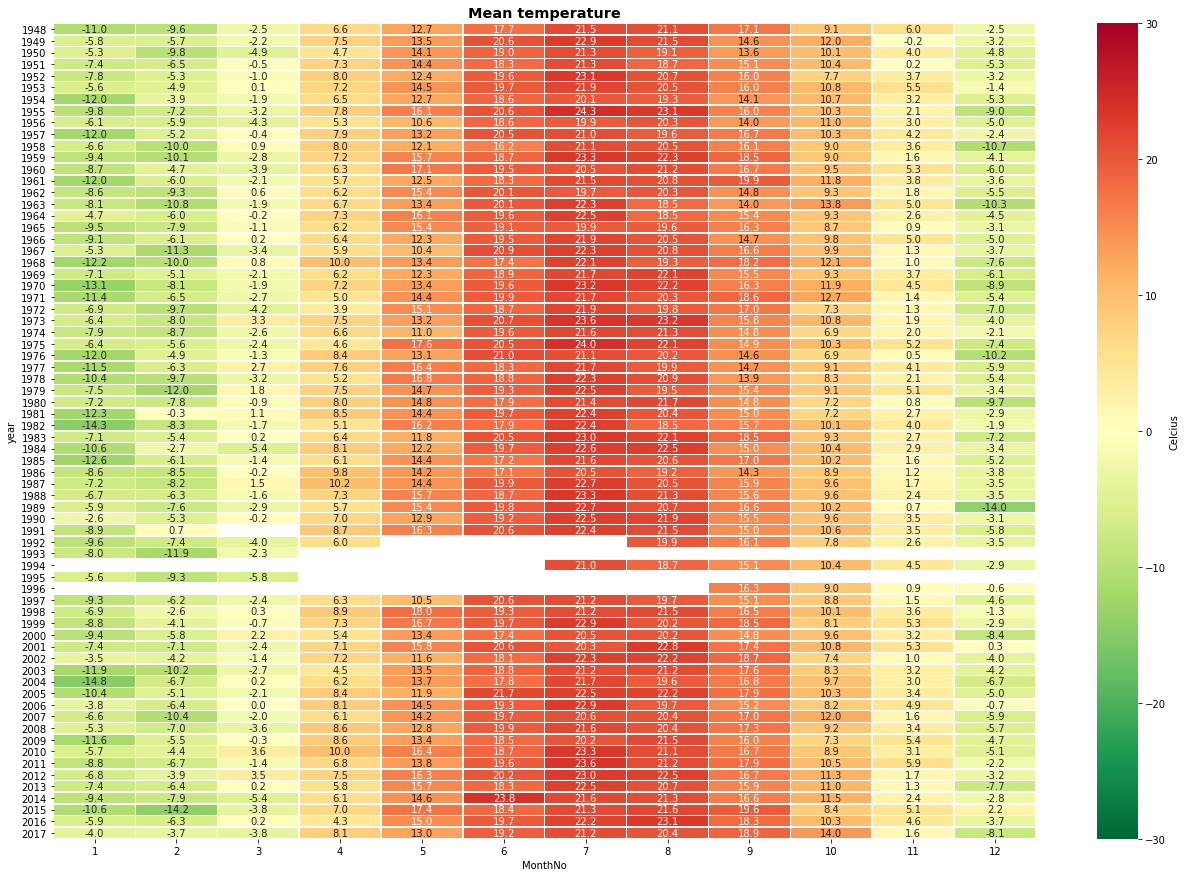

In [16]:
ax = plt.axes()
sns.heatmap(Montreal_pivot, cmap='RdYlGn_r', linewidths=0.5, annot=True , ax = ax,vmin=-30, vmax=30,center=0, fmt='.1f',yticklabels=True, cbar_kws={'label': 'Celcius'})
ax.set_title('Mean temperature', weight='bold', fontsize="x-large")
figure = ax.get_figure()    
figure.set_size_inches(22, 15) 
plt.show()

- Other examples: Boxplot,  violin plot, line plot 

https://seaborn.pydata.org/generated/seaborn.boxplot.html

https://seaborn.pydata.org/generated/seaborn.violinplot.html

https://seaborn.pydata.org/generated/seaborn.lineplot.html

At first, we create a new variable containing the months but in string of characters. For this we apply the <b> .strftime () </b> method of datetime.

In [17]:
resamp_Montreal['month'] = resamp_Montreal.index.strftime("%b")

In [18]:
resamp_Montreal.head()

,mean,amin,amax,percentile_90,percentile_95,year,MonthNo,month
datetime,,,,,,,,
1948-01-31,-10.990323,-23.4,-3.1,-3.60,-3.40,1948,1,Jan
1948-02-29,-9.586207,-20.8,3.6,-2.64,-0.32,1948,2,Feb
1948-03-31,-2.461290,-17.8,7.5,5.60,6.40,1948,3,Mar
1948-04-30,6.640000,-1.7,14.5,12.08,13.13,1948,4,Apr
1948-05-31,12.664516,6.7,21.7,16.70,18.35,1948,5,May


In [19]:
from tabulate import tabulate
print(tabulate(resamp_Montreal.head(), headers='keys', tablefmt='pipe'))

| datetime            |      mean |   amin |   amax |   percentile_90 |   percentile_95 |   year |   MonthNo | month   |
|:--------------------|----------:|-------:|-------:|----------------:|----------------:|-------:|----------:|:--------|
| 1948-01-31 00:00:00 | -10.9903  |  -23.4 |   -3.1 |           -3.6  |           -3.4  |   1948 |         1 | Jan     |
| 1948-02-29 00:00:00 |  -9.58621 |  -20.8 |    3.6 |           -2.64 |           -0.32 |   1948 |         2 | Feb     |
| 1948-03-31 00:00:00 |  -2.46129 |  -17.8 |    7.5 |            5.6  |            6.4  |   1948 |         3 | Mar     |
| 1948-04-30 00:00:00 |   6.64    |   -1.7 |   14.5 |           12.08 |           13.13 |   1948 |         4 | Apr     |
| 1948-05-31 00:00:00 |  12.6645  |    6.7 |   21.7 |           16.7  |           18.35 |   1948 |         5 | May     |


- Boxplot: 

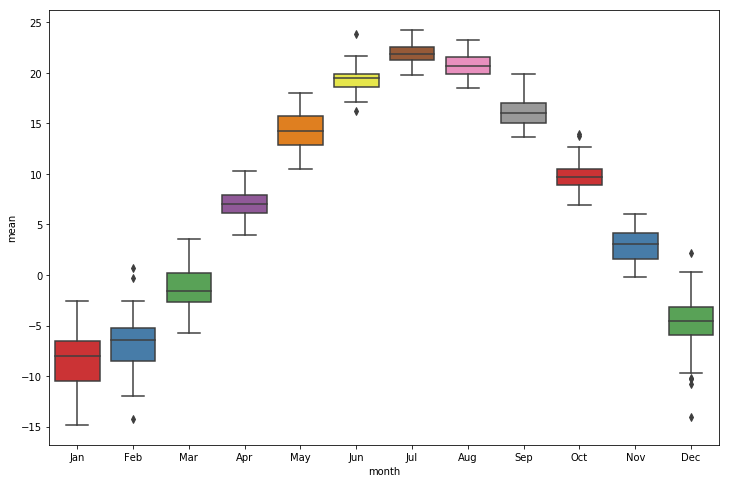

In [20]:
ax = plt.axes()
sns.boxplot(x="month", y="mean", data=resamp_Montreal, palette="Set1")  
figure = ax.get_figure()    
figure.set_size_inches(12, 8) 
plt.show()

- Violin plot: 

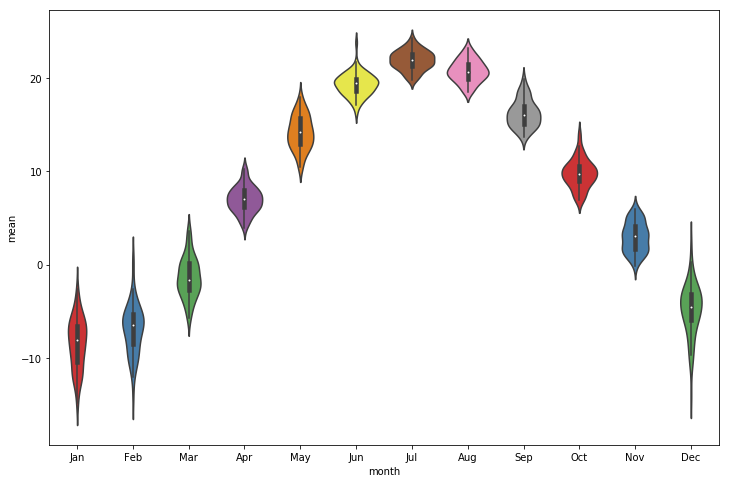

In [21]:
ax = plt.axes()
sns.violinplot(x="month", y="mean", data=resamp_Montreal, palette="Set1")  
figure = ax.get_figure()    
figure.set_size_inches(12, 8)
plt.show()

- Line plot: 

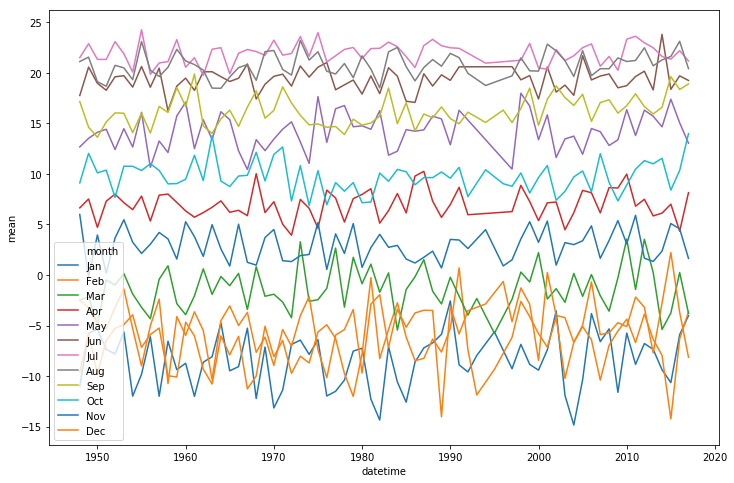

In [22]:
ax = plt.axes()
sns.lineplot(x=resamp_Montreal.index.year, y="mean",
             hue="month",
             data=resamp_Montreal,
             palette="tab10")
figure = ax.get_figure()    
figure.set_size_inches(12, 8)
plt.show()

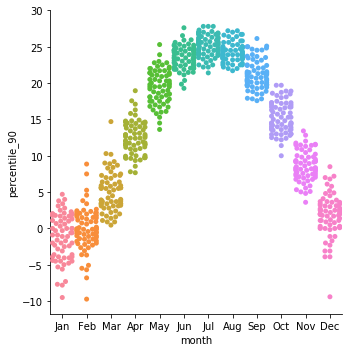

In [23]:
sns.catplot(x="month", y="percentile_90", data=resamp_Montreal, kind="swarm")
plt.show()

- We can combine several Seaborn charts:

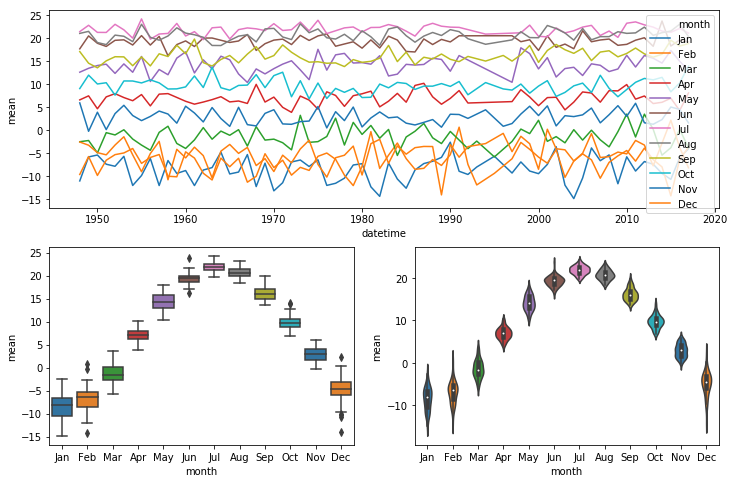

In [24]:
ax = plt.axes()
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
sns.lineplot(x=resamp_Montreal.index.year, y="mean", hue="month", data=resamp_Montreal, palette="tab10")
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
sns.boxplot(x="month", y="mean", data=resamp_Montreal, palette="tab10") 
ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)
sns.violinplot(x="month", y="mean", data=resamp_Montreal, palette="tab10") 
figure = ax.get_figure()    
figure.set_size_inches(12, 8) 
plt.show()

### 4- Fonction groupby

Nous avons vu dans un notebook précédent la méthode <b>.groupby()</b> de Pandas.

https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm

Cette méthode est très utile en la combinant avec des objets datetime.

Reprenons notre dataframe rééchantillonné précédemment. 


In [25]:
resamp_Montreal.head()

,mean,amin,amax,percentile_90,percentile_95,year,MonthNo,month
datetime,,,,,,,,
1948-01-31,-10.990323,-23.4,-3.1,-3.60,-3.40,1948,1,Jan
1948-02-29,-9.586207,-20.8,3.6,-2.64,-0.32,1948,2,Feb
1948-03-31,-2.461290,-17.8,7.5,5.60,6.40,1948,3,Mar
1948-04-30,6.640000,-1.7,14.5,12.08,13.13,1948,4,Apr
1948-05-31,12.664516,6.7,21.7,16.70,18.35,1948,5,May


In [26]:
from tabulate import tabulate
print(tabulate(resamp_Montreal.head(), headers='keys', tablefmt='pipe'))

| datetime            |      mean |   amin |   amax |   percentile_90 |   percentile_95 |   year |   MonthNo | month   |
|:--------------------|----------:|-------:|-------:|----------------:|----------------:|-------:|----------:|:--------|
| 1948-01-31 00:00:00 | -10.9903  |  -23.4 |   -3.1 |           -3.6  |           -3.4  |   1948 |         1 | Jan     |
| 1948-02-29 00:00:00 |  -9.58621 |  -20.8 |    3.6 |           -2.64 |           -0.32 |   1948 |         2 | Feb     |
| 1948-03-31 00:00:00 |  -2.46129 |  -17.8 |    7.5 |            5.6  |            6.4  |   1948 |         3 | Mar     |
| 1948-04-30 00:00:00 |   6.64    |   -1.7 |   14.5 |           12.08 |           13.13 |   1948 |         4 | Apr     |
| 1948-05-31 00:00:00 |  12.6645  |    6.7 |   21.7 |           16.7  |           18.35 |   1948 |         5 | May     |


On souhaiter grouper notre dataframe par mois avec la méthode <b>.groupeby()</b>

In [27]:
resamp_Montreal_grouped  = resamp_Montreal.groupby("month") 
resamp_Montreal_grouped.groups     # Pour voir les groupes

{'Apr': DatetimeIndex(['1948-04-30', '1949-04-30', '1950-04-30', '1951-04-30',
                '1952-04-30', '1953-04-30', '1954-04-30', '1955-04-30',
                '1956-04-30', '1957-04-30', '1958-04-30', '1959-04-30',
                '1960-04-30', '1961-04-30', '1962-04-30', '1963-04-30',
                '1964-04-30', '1965-04-30', '1966-04-30', '1967-04-30',
                '1968-04-30', '1969-04-30', '1970-04-30', '1971-04-30',
                '1972-04-30', '1973-04-30', '1974-04-30', '1975-04-30',
                '1976-04-30', '1977-04-30', '1978-04-30', '1979-04-30',
                '1980-04-30', '1981-04-30', '1982-04-30', '1983-04-30',
                '1984-04-30', '1985-04-30', '1986-04-30', '1987-04-30',
                '1988-04-30', '1989-04-30', '1990-04-30', '1991-04-30',
                '1992-04-30', '1993-04-30', '1994-04-30', '1995-04-30',
                '1996-04-30', '1997-04-30', '1998-04-30', '1999-04-30',
                '2000-04-30', '2001-04-30', '2002-04-30',

- Pour itérer à travers les groupe: 

In [28]:
for MonthNo,group in resamp_Montreal_grouped :                              
    print(MonthNo)
    print(group)
    

Apr
                 mean  amin  amax  percentile_90  percentile_95  year  \
datetime                                                                
1948-04-30   6.640000  -1.7  14.5          12.08         13.130  1948   
1949-04-30   7.516667   2.0  15.8          12.43         14.370  1949   
1950-04-30   4.710000  -4.2  11.7           8.56         10.770  1950   
1951-04-30   7.296667   1.4  15.0          11.78         13.105  1951   
1952-04-30   7.996667  -1.4  15.3          14.01         15.000  1952   
1953-04-30   7.150000   2.8  11.1           9.80         10.240  1953   
1954-04-30   6.460000 -10.9  17.8          12.40         16.015  1954   
1955-04-30   7.800000  -0.6  15.3          11.73         13.210  1955   
1956-04-30   5.336667   2.0  12.2           7.67          9.365  1956   
1957-04-30   7.893333  -2.8  18.7          17.56         18.210  1957   
1958-04-30   8.003333  -0.9  18.9          14.81         16.405  1958   
1959-04-30   7.173333  -0.6  14.5          11.4

- Pour sélectionner un groupe: méthode get_group() 

In [29]:
# nous avons groupé notre DataFrame par mois suivant l'index "month"
# la méthode .get_group() nous permet de sélectionner tout le sous-groupe correspondant. 
resamp_Montreal_grouped.get_group('Dec').head()

,mean,amin,amax,percentile_90,percentile_95,year,MonthNo,month
datetime,,,,,,,,
1948-12-31,-2.522581,-15.0,7.0,2.2,3.90,1948,12,Dec
1949-12-31,-3.219355,-13.9,8.9,5.8,6.70,1949,12,Dec
1950-12-31,-4.835484,-23.4,3.9,0.0,1.95,1950,12,Dec
1951-12-31,-5.312903,-19.2,13.1,7.0,11.15,1951,12,Dec
1952-12-31,-3.183871,-17.0,7.8,2.0,4.60,1952,12,Dec


In [30]:
from tabulate import tabulate
print(tabulate(resamp_Montreal_grouped.get_group('Dec').head(), headers='keys', tablefmt='pipe'))

| datetime            |     mean |   amin |   amax |   percentile_90 |   percentile_95 |   year |   MonthNo | month   |
|:--------------------|---------:|-------:|-------:|----------------:|----------------:|-------:|----------:|:--------|
| 1948-12-31 00:00:00 | -2.52258 |  -15   |    7   |             2.2 |            3.9  |   1948 |        12 | Dec     |
| 1949-12-31 00:00:00 | -3.21935 |  -13.9 |    8.9 |             5.8 |            6.7  |   1949 |        12 | Dec     |
| 1950-12-31 00:00:00 | -4.83548 |  -23.4 |    3.9 |             0   |            1.95 |   1950 |        12 | Dec     |
| 1951-12-31 00:00:00 | -5.3129  |  -19.2 |   13.1 |             7   |           11.15 |   1951 |        12 | Dec     |
| 1952-12-31 00:00:00 | -3.18387 |  -17   |    7.8 |             2   |            4.6  |   1952 |        12 | Dec     |


- Aggrégation: Une fonction agrégée renvoie une seule valeur agrégée pour chaque groupe. 

Une fois le groupe créé, plusieurs opérations d'aggrégation peuvent être effectuées sur les données groupées.


In [31]:
# On va cacluler la moyenne de la variable 'percentile_90' pour chaque groupe. 
resamp_Montreal_grouped['percentile_90'].agg(np.mean)

month
Apr    12.434848
Aug    24.283582
Dec     1.790000
Feb    -0.098529
Jan    -1.046324
Jul    25.119242
Jun    23.557385
Mar     5.021493
May    19.483846
Nov     8.615147
Oct    15.280294
Sep    21.236765
Name: percentile_90, dtype: float64

In [32]:
resamp_Montreal_grouped['percentile_90'].agg(np.size)

month
Apr    70.0
Aug    70.0
Dec    70.0
Feb    70.0
Jan    70.0
Jul    70.0
Jun    70.0
Mar    70.0
May    70.0
Nov    70.0
Oct    70.0
Sep    70.0
Name: percentile_90, dtype: float64

## Exercice :  

## Compute day degres index for Montreal station

1- open and read file "MONTREAL_tasmoy_1948_2017.txt"

2- Define datetime index (time range: 01/01/1948 : 31/12/2017 )

3- Write a function to compute the index

4- For each year, compute temperature mean, min , max and DG0 index

5- Make a plot



1- 

In [33]:
import numpy as np
with open('./data/MONTREAL_tasmoy_1948_2017.txt', 'r') as file:
     rows = file.read()
data_EC_Montreal = [float(row) for row in rows.split()]  

2- 

In [38]:
import pandas as pd
import datetime
from datetime import date
df = pd.DataFrame()

start = date(1948, 1, 1)
end = date(2017, 12, 31)
delta=(end-start) 
nb_days = delta.days + 1 
rng = pd.date_range(start, periods=nb_days, freq='D')

df['datetime'] = rng
df.index = df['datetime'] 
df['Temperature Montreal'] = data_EC_Montreal
#df

3- 

In [39]:
def DG0(S):  
     ind_DGO=[]
     ind_DGO = sum(x for x in S if x >= 0)
     return ind_DGO  

4- 

In [37]:
resamp = df.resample('AS')
dataset = resamp.agg([np.mean, np.min, np.max, DG0])
dataset.head()

Temperature Montreal                    
                           mean  amin  amax     DG0
datetime                                           
1948-01-01             7.233880 -23.4  27.8  3506.1
1949-01-01             8.047671 -15.0  28.4  3602.9
1950-01-01             6.848767 -23.6  25.9  3318.9
1951-01-01             7.245205 -24.2  25.3  3404.9
1952-01-01             7.855464 -20.0  27.5  3474.2

In [74]:
from tabulate import tabulate
print(tabulate(dataset.head(), headers='keys', tablefmt='pipe'))

| datetime            |   ('Temperature Montreal', 'mean') |   ('Temperature Montreal', 'amin') |   ('Temperature Montreal', 'amax') |   ('Temperature Montreal', 'DG0') |
|:--------------------|-----------------------------------:|-----------------------------------:|-----------------------------------:|----------------------------------:|
| 1948-01-01 00:00:00 |                            7.23388 |                              -23.4 |                               27.8 |                            3506.1 |
| 1949-01-01 00:00:00 |                            8.04767 |                              -15   |                               28.4 |                            3602.9 |
| 1950-01-01 00:00:00 |                            6.84877 |                              -23.6 |                               25.9 |                            3318.9 |
| 1951-01-01 00:00:00 |                            7.24521 |                              -24.2 |                               25.3 |           

5- 

In [75]:
dataset.columns = dataset.columns.droplevel(0)

In [76]:
dataset['DG0'].head()

datetime
1948-01-01    3506.1
1949-01-01    3602.9
1950-01-01    3318.9
1951-01-01    3404.9
1952-01-01    3474.2
Freq: AS-JAN, Name: DG0, dtype: float64

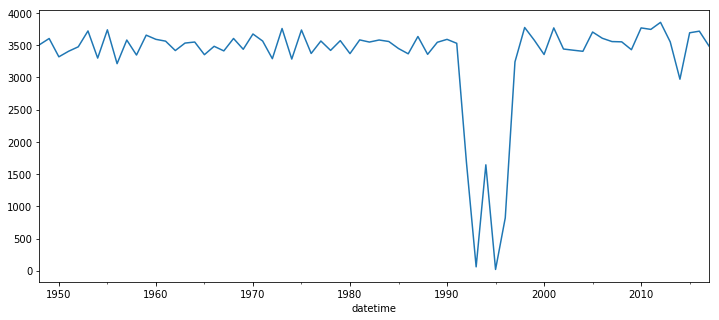

In [77]:
import matplotlib.pyplot as plt
dataset['DG0'].plot(figsize=(12,5))
plt.show()

In [78]:
# we must filter missing values
def DG0bis(S):  
     ind_DGObis=[]      
     S_no_nan = S[~np.isnan(S)]
     N = len(S)
     N2 = len(S_no_nan)
     if ((N2/N) < 0.8): 
         ind_DGObis = np.empty(1)
         ind_DGObis = np.nan
     else:       
         ind_DGObis = sum(x for x in S if x >= 0)
     return ind_DGObis 

In [79]:
dataset = resamp.agg([np.mean, np.min, np.max, DG0, DG0bis])
dataset.head()

Temperature Montreal                            
                           mean  amin  amax     DG0  DG0bis
datetime                                                   
1948-01-01             7.233880 -23.4  27.8  3506.1  3506.1
1949-01-01             8.047671 -15.0  28.4  3602.9  3602.9
1950-01-01             6.848767 -23.6  25.9  3318.9  3318.9
1951-01-01             7.245205 -24.2  25.3  3404.9  3404.9
1952-01-01             7.855464 -20.0  27.5  3474.2  3474.2

In [80]:
from tabulate import tabulate
print(tabulate(dataset.head(), headers='keys', tablefmt='pipe'))

| datetime            |   ('Temperature Montreal', 'mean') |   ('Temperature Montreal', 'amin') |   ('Temperature Montreal', 'amax') |   ('Temperature Montreal', 'DG0') |   ('Temperature Montreal', 'DG0bis') |
|:--------------------|-----------------------------------:|-----------------------------------:|-----------------------------------:|----------------------------------:|-------------------------------------:|
| 1948-01-01 00:00:00 |                            7.23388 |                              -23.4 |                               27.8 |                            3506.1 |                               3506.1 |
| 1949-01-01 00:00:00 |                            8.04767 |                              -15   |                               28.4 |                            3602.9 |                               3602.9 |
| 1950-01-01 00:00:00 |                            6.84877 |                              -23.6 |                               25.9 |                          

In [41]:
dataset.columns = dataset.columns.droplevel(0)

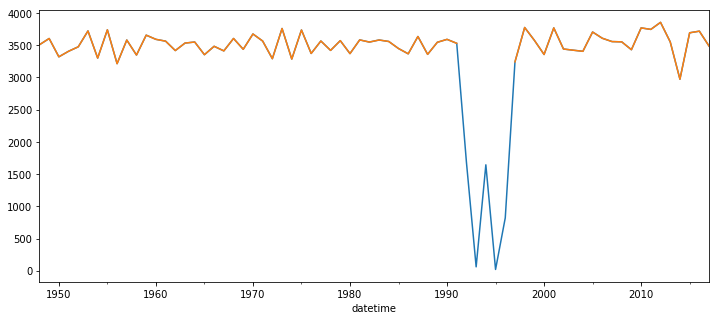

In [42]:
dataset['DG0'].plot(figsize=(12,5))
dataset['DG0bis'].plot(figsize=(12,5))
plt.show()